In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

### Loading Data

In [2]:
#code snippet from https://www.quora.com/How-can-I-read-a-data-set-of-images-in-a-PNG-format-in-Python-code
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        images.append(np.asarray(img))
    return np.array(images)

In [3]:
images = load_images_from_folder(r"E:\Data\S&P500\train_images_90in_3out")
images.shape

(3722, 100, 200, 4)

In [4]:
images = images/255

In [5]:
images.shape

(3722, 100, 200, 4)

In [6]:
import pandas as pd

In [7]:
path = r"E:\Data\S&P500"
file = r"\label_90out_3in_3pctchange.csv"

In [8]:
df = pd.read_csv(path+file, sep=",")

In [9]:
df['index'] = df['Unnamed: 0']
df = df.drop(['Unnamed: 0'], axis = 1)
df["dates"] = pd.to_datetime(df["dates"])
df = df.set_index('dates')
df

,label,close,future_mean,index
dates,,,,
2004-05-11,1,1095.449951,1096.473307,0
2004-05-12,1,1097.280029,1092.079956,1
2004-05-13,1,1096.439941,1090.429972,2
2004-05-14,1,1095.699951,1088.090007,3
2004-05-17,1,1084.099976,1089.786662,4
2004-05-18,1,1091.489990,1090.476685,5
2004-05-19,1,1088.680054,1092.720011,6
2004-05-20,2,1089.189941,1100.673381,7
2004-05-21,2,1093.560059,1107.800008,8


In [10]:
df.shape

(3722, 4)

In [11]:
def splitTrain(images, labels_df, year1, year2):
    split = labels_df.loc[year1 : year2]
    indices = [split['index'][0], split['index'][-1]]
    
    splitImages = images[indices[0]:indices[1]+1]
    splitLabels = split['label']
    
    return np.array(splitImages), np.array(splitLabels)

In [12]:
train_images, train_labels = splitTrain(images, df, '2004','2008')

In [13]:
train_labels.shape, train_images.shape

((1170,), (1170, 100, 200, 4))

0


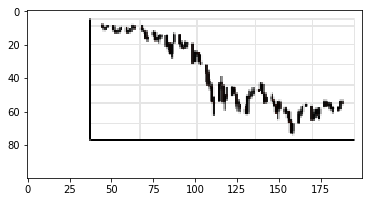

In [14]:
plt.imshow(train_images[-10])
print(train_labels[-10])

Note majority of the signals in the training are sells over 80% which means it was mostly a bearish market.

In [15]:
pd.DataFrame(train_labels).apply(pd.value_counts)

,0
1,817
0,180
2,173


In [16]:
test_images, test_labels = splitTrain(images, df, '2009','2010')

In [17]:
train_images.shape, train_labels.shape

((1170, 100, 200, 4), (1170,))

### Model

In [18]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks

In [19]:
def baselineModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 200, 4)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    #Dense Layers and output
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    
    return model

In [20]:
#https://stackoverflow.com/questions/37293642/how-to-tell-keras-stop-training-based-on-loss-value
class EarlyStoppingByLossVal(callbacks.Callback):
    def __init__(self, monitor='accuracy', value=.951, verbose=0):
        super(callbacks.Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("\nEpoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [53]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical

In [70]:
class score(callbacks.Callback):
    def __init__(self, X_train, y_train, X_val, y_val):
        super(score, self).__init__()
        self.bestAUC = 0
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        
    def on_epoch_end(self, epoch, logs={}):
        pred = self.model.predict(np.array(self.X_train))[:,[0,2]]
        auc = roc_auc_score(to_categorical(self.y_train)[:,[0,2]], pred)

        pred = self.model.predict(np.array(self.X_val))[:,[0,2]]
        auc_val = roc_auc_score(to_categorical(self.y_val)[:,[0,2]], pred)
        print("\nTrain AUC: {} Valid AUC: {}".format(auc, auc_val))
        
        if (self.bestAUC < auc_val) :
            self.bestAUC = auc_val
            self.model.save("bestNet.h5", overwrite=True)
        return

In [71]:
model = baselineModel()
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 98, 198, 32)       1184      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 49, 99, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 47, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 48, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 21, 46, 64)        36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 61824)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [72]:
callback = [score(train_images, train_labels, test_images, test_labels)]

model.fit(train_images, train_labels,validation_data=(test_images,test_labels) ,batch_size=10,epochs=100, callbacks=callback)

Train on 1170 samples, validate on 504 samples
Epoch 1/100
1150/1170 [============================>.] - ETA: 0s - loss: 1.0004 - accuracy: 0.6878
Train AUC: 0.6217440003606571 Valid AUC: 0.5670034834196905
1170/1170 [==============================] - 6s 5ms/sample - loss: 0.9927 - accuracy: 0.6906 - val_loss: 1.1276 - val_accuracy: 0.5139
Epoch 2/100
1150/1170 [============================>.] - ETA: 0s - loss: 0.8230 - accuracy: 0.6983
Train AUC: 0.6936277273787588 Valid AUC: 0.6124604352334329
1170/1170 [==============================] - 5s 5ms/sample - loss: 0.8198 - accuracy: 0.7000 - val_loss: 1.1693 - val_accuracy: 0.5139
Epoch 3/100
1150/1170 [============================>.] - ETA: 0s - loss: 0.7819 - accuracy: 0.7009
Train AUC: 0.7462262057836837 Valid AUC: 0.5899141034398401
1170/1170 [==============================] - 6s 5ms/sample - loss: 0.7810 - accuracy: 0.7026 - val_loss: 1.3769 - val_accuracy: 0.5119
Epoch 4/100
1150/1170 [============================>.] - ETA: 0s - loss

KeyboardInterrupt: 

In [23]:
model.save("model1.h5")

In [141]:
x =  test_images[240].reshape(1,100,200,4)
y = np.array(test_labels[240]).reshape(1,)
x.shape, y.shape

((1, 100, 200, 4), (1,))

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.load_model("model1.h5")


#model.evaluate(x, y)

In [2]:
#model.predict(x).argmax(axis=1)[0]

In [3]:
import numpy as np
from PIL import Image
import os

In [4]:
img = np.array(
            Image.open(
                os.path.join(r"C:\Users\ken\Desktop\OneDrive\OneDrive - Knights - University of Central Florida\UCF Spring 2019\Machine Learning\signal",
                             r"backtest.png"))).reshape(1,100,200,4)
img = img/255

In [5]:
model.predict(img)

array([[7.1786977e-02, 9.2821276e-01, 1.9995726e-07]], dtype=float32)

In [16]:
train_labels[-0]

1

In [17]:
train_labels[0]

1

This model would have gotten 50% of the calls correct which is to be expected.